In [1]:
# %autosave 0

# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model for classifying images of clothes. 
- Convolutional neural networks for image classification
- TensorFlow and Keras -- frameworks for building neural networks
- Using pretrained neural networks
- Internals of a convolutional neural network
- Training a model with transfer learning
- Data augmentations--the process of generating more training data

We'll be working with multiclass image classification with deep learning. The deep learning frameworks like TensorFlow and Keras will be implemented on clothing dataset to classify images of t-shirts. 

The dataset has 5000 images of 20 different classes, however, we'll be using the subset which contains 10 of the most popular classes. The dataset can be downloaded from the below link. 

The materials of this week will help you start using neural networks and perform any similar image classification project. 

## 8.1 Fashion classification

Imagine that we work at an online fashion marketplace. Our users upload thousands of images every day to sell their clothes. We want to help our users create listings faster by automatically recommending the right category for their clothes. We want to have a service that we can call fashion classification service. This service will get a picture and it will reply with a suggested category, which will help the user to select the category faster. All they need to do will be just upload a picture and then just click publish. So our goal is to make it simpler for the user to create a listing. 

For this purpose, we need a model for classifying images. Previously, we covered multiple models for classification: logistic regression, decision trees, random forests, and gradient boosting. These models work great with tabular data, but it's quite difficult to use them for images. 

To solve our problem, we need a different type of model: a convolutional neural network, a special model used for images. These neural networks consist of many layers, and that's why they are often called "deep." Deep learning is a part of machine learning that deals with deep neural networks. 

The frameworks for training these models are also different from what we saw previously, so in this lesson, we use TensorFlow and Keras instead of Scikit-learn.

The plan for our project is:
- First, we download the dataset and use a pretrained model to classify images.
- Then, we talk about neural networks, and see how they work internally.
- After that, we adjust the pretrained neural network for solving our tasks.
- Finally, we expand our dataset by generating many more images from the images we have.

For evaluating the quality of our models, let's use accuracy: the percentage of items we classified correctly. 

It's not possible to cover all the theory behind deep learning in just one lesson. In this course, we focus on the most fundamental parts, which is enough for completing the project of this lesson and other similar projects about image classification. When we come across concepts that are non-essential for completing this project, for details, we refer to CS231n--a course about neural networks from Stanford University. 

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small
* Corresponding Medium article: https://medium.com/data-science-insider/clothing-dataset-5b72cd7c3f1f

Links:

* CS231n CNN for Visual Recognition course notes: https://cs231n.github.io/

### Downloading the clothing dataset

We will use a subset of the clothing dataset, which contains around 3,800 images of 10 different classes. 

The data is available in a GitHub repository. Let's clone it:

In [2]:
# !git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

The dataset is already split into folders:
- `train`: Images for training a model (3,068 images)
- `validation`: Images for validating (341 image)
- `test`: Images for testing (372 images)

Each of these folders has 10 subfolders: one subfolder for each type of clothing. 

As we see, this dataset contains 10 classes of clothes, from dresses and hats, to shorts and shoes. The clothing items have different colors and the background is different. Some items are on the floor, some are spread out on a bed or on a table, and some are hung in front of a neutral background. 

With this variety of images, it's not possible to use the methods we previously covered. We need a special type of model: neural networks. This model also requires different tools, and we cover them next. 

## 8.1b Setting up the Environment on Saturn Cloud

### GPU vs. CPU
Training a neural network is a computationally demanding process, and it requires powerful hardware to make it faster. To speed up training, we usually use GPUs--graphical processing units, or, simply, graphic cards.

For this lesson, a GPU is not required. You can do everything on your laptop, but without a GPU, it will be approximately eight times slower than with a GPU. If you have a GPU card, you need to install special drivers from TensorFlow to use it. (Check the official documentation of TensorFlow for more details: https://www.tensorflow.org/install/gpu.) Alternatively, you can rent a preconfigured GPU server. 

For example, we can use AWS SageMaker to rent a Jupyter Notebook instance with everything already set up. Other cloud providers also have servers with GPU. In this course, we'll set up the environment on Saturn Cloud. 

Regardless of the environment we use, the code works anywhere, as long as you can install Python and TensorFlow there. 

* Login link: https://zoomcamp.internal.saturnenterprise.io/
* Image: saturn-python-tensorflow (2024.08.01)

### Setting up the Environment on Saturn Cloud (update for Nov 2024 / macOS 15.1)

0. Create a secret key to push notebook to GitHub with SSH (Optional).
    - For that, you should have already generated an SSH key on your laptop with your GitHub account. Refer to this [tutorial](https://docs.github.com/en/authentication/connecting-to-github-with-ssh/generating-a-new-ssh-key-and-adding-it-to-the-ssh-agent). 

1. On website click `Secrets` (1.) -> create `new` (2.)![new Secret](https://github.com/user-attachments/assets/c895d558-b666-4bc7-bf07-ce5a186b4144)

2. In terminal run:

```bash
cat ~/.ssh/id_rsa
```

3. Copy the key and paste it in the secret value field, name it `id_rsa`, add an empty line and a dot `.`, make sure there are no empty characters in the line after `-----END OPENSSH PRIVATE KEY-----`. Click `Add`.

4. Under resources (1.) select `New Python Server` (2.). ![New resource](https://github.com/user-attachments/assets/4bf0748a-ce66-4b53-a993-165f0d38eee9)

5. Configure the server:
    - i. give it a name (1.)
    - ii. Show advanced settings (2.)
    - iii. select 10Gi (3.)
    - iv. select GPU (4.)
    - v. select TensorFlow environment (5.)
    - vi. select pip (6.) and add scipy
    - vii. add your github repo `git:....` (7.) (optional)
    - viii. allow SSH (8.)
    - ix. create the server (9.)

![Create Saturn Resource](https://github.com/user-attachments/assets/1e1aad55-0e9b-46a3-922e-bdd291004009)


6. when you added a github repo, you need to set your SSH public key. See yellow warning in image below. Click on the link.

![Needs public key](https://github.com/user-attachments/assets/5d770e99-1299-4e27-ad2d-5ee5014710f2)


7. In terminal run:

```bash
cat ~/.ssh/id_rsa.pub
```

and copy the key. Set name, paste key in the value field and click `Add`.

![Add public key](https://github.com/user-attachments/assets/232b9155-79ab-484a-bc00-d8674c0b39e9)


You can manage your keys under User (1.), manage <username> (2.), SSH keys (3.)

![Manage keys](https://github.com/user-attachments/assets/7d16cfdf-b33f-4cb2-a792-e06f7b3baf2f)


You will find the configured resource at the bottom of the resources page.

>**CAUTION:**
>Your SSH keys could have different names, important is that the private key is named `id_rsa` and the public key is named `id_rsa.pub`. Depending on the crypto system you use, the key could be named `id_rsa` or `id_ed25519` or `id_ecdsa` or `id_dsa`. The public key will have the same name with `.pub` at the end. Never share your private key with anyone.


## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

TensorFlow is a low-level framework used to train deep learning models and it's not always easy to use. Keras, on the other hand, is a higher-level library built on top of TensorFlow. Keras makes training neural networks a lot simpler. It comes preinstalled together with TensorFlow, so we don't need to install anything extra. Keras used to be a separate library but starting from TensorFlow version 2+, Keras became a part of the TensorFlow library. The libraries can be installed using `pip install tensorflow` (for CPU and GPU). However, additional setup is required to integrate TensorFlow with GPU.

> **Note:** Previously, Keras was not a part of TensorFlow, and you can find many examples on the internet where it's still a separate library. However, the interface of Keras hasn't changed significantly, so most of the examples you may discover still work in the new Keras.

Neural networks expect an image of a certain size, therefore, we need to provide the image size in `target_size` parameter of the `load_img` function.

Each image consists of pixel and each of these pixels has a shape of 3 dimensions (height, width, color channels). A typical color image consists of three color channels: `red`, `green`, and `blue`. Each color channel has 8 bits or 1 byte and can represent a distinct value between 0 to 255 (uint8 type). 

**Classes, functions, and methods:**
- `import tensorflow as tf`: to import tensorflow library
- `from tensorflow import keras`: to import keras
- `from tensorflow.keras.preprocessing.image import load_img`: to import load_img function
- `load_img('path/to/image', target_size=(150, 150))`: to load the image of 150 x 150 size in PIL format
- `np.array(img)`: convert image into a numpy array of 3D shape, where each row of the array represents the value of red, green, and blue color channels of one pixel in the image


In the lesson, the `load_img` function from Keras is imported using:
```python
from tensorflow.keras.processing.image import load_img
```

If the import is not working, try using:
```python
from tensorflow.keras.utils import load_img
```

Refer to the TensorFlow documentation: https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img



In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [16]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.18.0
Keras version: 3.7.0


Keras offers a special function for loading images called `load_img`. Let's import it:

In [15]:
from tensorflow.keras.preprocessing.image import load_img

> **NOTE:** When Keras was a separate package, the imports looked like this:
> ```python
> from keras.preprocessing.image import load_img
> ```

If you find some old Keras code on the internet and want to use it with the latest versions of TensorFlow, simply add `tensorflow.` at the beginning when importing it. Most likely, it will be enough to make it work. 


Let's use this function to take a look at one of the images:

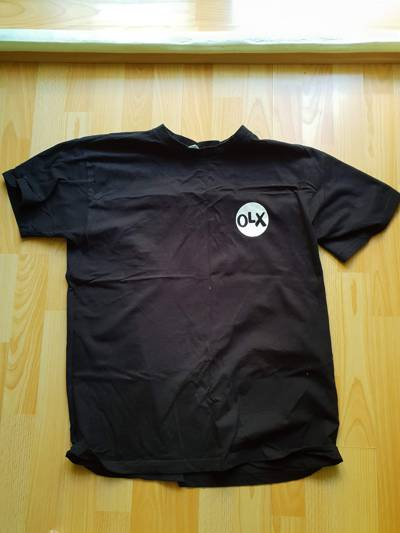

In [17]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

After executing the cell, we should see an image of a T-shirt. 

To use this image in a neural network, we need to resize it because the models always expect images of a certain size (299 x 299 or 224 x 224 or 150 x 150). For example, the network we use in this lesson requires a 150 x 150 image or an 299 x 299 image.

To resize the image, specify the `target_size` parameter:

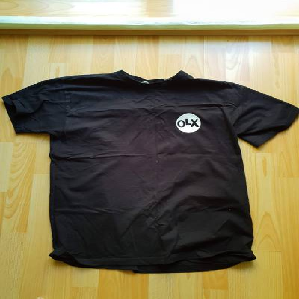

In [18]:
img = load_img(fullname, target_size=(299, 299))
img

As a result, the image becomes square and a bit squashed. 

In [19]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x25DE0BDDDD0>


The library for processing images is called PIL (Python Image Library), which is what many libraries use for processing images. 

The `img` variable is an `Image` object, which we need to convert to a NumPy array. It's easy to do:

In [20]:
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

This array should have the same shape as the image. Let's check it:

In [21]:
x.shape

(299, 299, 3)

We see `(299, 299, 3)`. It contains three dimensions:
- The width of the image: 299
- The height of the image: 299
- The number of channels: red, green, blue

For each of these channels, we have an array and this array contains numbers between 0 and 255, which is 1 byte. So, each cell is a number. Then, we actually have three such channels (RGB). 

A value of an original image cell would be a combination of three values (red, green, blue) from each color channel. For example, a value of a black t-shirt image cell has probably almost 0 in all these three channels. This is how images are encoded internally and in our case, it will be an array of size 299 x 299. Each of these rows is a pixel.     

This is how we turn an image that we load with Keras into a NumPy array. The dtype of this NumPy array is uint8 (unsigned integer)--it doesn't have a sign so it goes from 0 to 255 and not from -127 to 128. It's basically an integer that takes 8 bits or 1 byte.

Let's now use a neural network to classify this image. 

## 8.3 Pre-trained convolutional neural networks

Neural networks are a class of machine learning models for solving classification and regression problems. Our problem is a classification problem--we need to determine the category of an image. 

However, our problem is special: we're dealing with images. This is why we need a special type of neural network--a convolutional neural network, which can extract visual patterns from an image and use them to make predictions. 

Pre-trained neural networks are available on the internet, so let's see how we can use one of them for this project. 

> **IMPORTANT:** If you rent a GPU from a cloud provider (such as AWS), don't forget to turn it off after you finish. It's not free and you might get a large bill at the end of the month.

### Using a pre-trained model

Training a convolutional neural network from scratch is a time-consuming process and requires a lot of data and powerful hardware. It may take weeks of non-stop training for large datasets like ImageNet with 14 million images. 

Luckily, we don't need to do it ourselves: we can use pre-trained models. Usually, these models are trained on ImageNet and can be used for general-purpose image classification. 

It's very simple, and we don't even need to download anything ourselves--Keras will take care of it automatically. We can use many different types of models (called *architectures*). You can find a good summary of available pre-trained models in the official Keras documentation. 

* ImageNet dataset: https://www.image-net.org/
  * An image database that has 14,197,122 images of 21841 classes
* Pre-trained models: https://keras.io/api/applications/
  * Provides a list of pre-trained deep learning models

The `keras.applications` module has different pre-trained models with different architectures. We'll use the model Xception, which takes the input image size of (229, 229), and each image's pixel is scaled between `-1` and `1`. 

We create the instance of the pre-trained model using `model = Xception(weights='imagenet', input_shape=(229, 229, 3))`. Our model will use the weights from pre-trained ImageNet and expect the input shape of (229, 229, 3) for images.

Along with image size, the model also expects the `batch_size`, which is the size of the batches of data (default 32). If one image is passed to the model, then the expected shape of the model should be (1, 229, 229, 3).

The image data was preprocessed using `preprocess_input` function during `Xception` model's pre-training. Therefore, we'll have to use this function on our data before making predictions, like so: `X = preprocess_input(X)`. 

The `pred = model.predict(X)` function returns 2D array of shape `(1, 1000)`, where 1000 is the probability of the image classes. `decode_predictions(pred)` can be used to get the class names and their probabilities in readable format.

In order to make the pre-trained model useful with specific to our case, we'll have to do some tweak, which we'll do in the coming sections. 

**Classes, functions, and methods:**
- `from tensorflow.keras.applications.xception import Xception`: import the model from Keras applications
- `from tensorflow.keras.application.xception import preprocess_input`: function to perform preprocessing on images
- `from tensorflow.keras.applications.xception import decode_predictions`: extract the predictions class names in the form of a tuple of list
- `model.predict(X)`: function to make predictions on the test images


For this project, we'll use Xception, a relatively small model that has good performance. First, we need to import the model itself and some helpful functions:

In [22]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

We imported three things:
- `Xception`: the actual model
- `preprocess_input`: a function for preparing the image to be used by the model
- `decode_prediction`: a function for decoding the model's prediction

Let's load this model:

In [23]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


We specify two parameters here:
- `weights`: We want to use a pre-trained model from ImageNet.
- `input_shape`: The size of the input images: height, width, and the number of channels. We resize the images to 299 x 299, and each image has three channels: red, green, and blue.

When we load it for the first time, it downloads the actual model from the internet. After it's done, we can use it. 

Let's test it on the image we saw previously. 

In [25]:
X = np.array([x])
X

array([[[[179, 171,  99],
         [179, 171,  99],
         [181, 173, 101],
         ...,
         [251, 253, 248],
         [251, 253, 248],
         [251, 254, 247]],

        [[188, 179, 112],
         [187, 178, 111],
         [186, 177, 108],
         ...,
         [251, 252, 247],
         [251, 252, 247],
         [251, 252, 246]],

        [[199, 189, 127],
         [200, 190, 128],
         [200, 191, 126],
         ...,
         [250, 251, 245],
         [250, 251, 245],
         [250, 251, 245]],

        ...,

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [183, 135,  25],
         [181, 133,  22],
         [183, 135,  24]],

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [182, 134,  23],
         [180, 132,  21],
         [182, 134,  23]],

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [181, 133,  22],
        

The model doesn't expect to get just a single image. It gets a *batch* of images--several images put together in one array. This array should have four dimensions: 
- The number of images
- The width
- The height
- The number of channels

For example, for 10 images, the shape is `(10, 299, 299, 3)`. Because we have just one image, we need to create a batch with this single image:

```python
X = np.array([x])
```

> **NOTE:** If we had several images, for example, `x`, `y`, and `z`, we'd write:
> ```python
> X = np.array([x, y, z])
> ```

Let's check its shape:

In [26]:
X.shape

(1, 299, 299, 3)

As we see, it's `(1, 299, 299, 3)`--it's one image of size 299 x 299 with three channels. 

Before we can apply the model to our image, we need to prepare it with the `preprocess_input` function:

In [27]:
X = preprocess_input(X)
X

array([[[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.41960788,  0.35686278, -0.20784312],
         ...,
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.99215686,  0.9372549 ]],

        [[ 0.47450984,  0.4039216 , -0.12156862],
         [ 0.4666667 ,  0.39607847, -0.12941176],
         [ 0.45882356,  0.38823533, -0.15294117],
         ...,
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.92941177]],

        [[ 0.56078434,  0.48235297, -0.00392157],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         [ 0.5686275 ,  0.49803925, -0.01176471],
         ...,
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863]],

        ...,

        [[ 0.2941177 ,  0.18431377, -0

This function converts the integers between 0 and 255 in the original array to numbers between -1 and 1. 

Now, we're ready to use the model. 

### Getting predictions

To apply the model, use the `predict` method:

In [28]:
pred = model.predict(X)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[3.23711865e-04, 1.57383693e-04, 2.13493026e-04, 1.52370369e-04,
        2.47626012e-04, 3.05035879e-04, 3.20591993e-04, 1.47499173e-04,
        2.03621661e-04, 1.49272295e-04, 1.95662928e-04, 2.10137208e-04,
        7.59264294e-05, 1.13972121e-04, 1.62683398e-04, 2.04638447e-04,
        1.97415793e-04, 1.44288744e-04, 1.40217366e-04, 1.73685810e-04,
        7.46690319e-04, 2.56966421e-04, 2.66808493e-04, 2.96513957e-04,
        3.73601797e-04, 2.77404120e-04, 2.16570872e-04, 2.27269964e-04,
        3.80812795e-04, 1.72165805e-04, 3.05400754e-04, 1.96431152e-04,
        3.92114831e-04, 4.78071044e-04, 2.91751057e-04, 3.25693225e-04,
        1.47395112e-04, 1.62361932e-04, 2.12710380e-04, 1.34028145e-04,
        2.40070309e-04, 6.75211253e-04, 2.54943239e-04, 1.44478487e-04,
        4.12820780e-04, 2.04408469e-04, 3.02957924e-04, 1.49339496e-04,
        1.99653543e-04, 2.27005672e-04, 2.93729157e-04, 2.27444500e-04,
        6.37644203e-04, 7.82615098e-04, 2.49557226e-04, 4.052703

In [29]:
pred.shape

(1, 1000)

This array is quite large--it contains 1,000 elements. 

In [30]:
pred[0, :10]

array([0.00032371, 0.00015738, 0.00021349, 0.00015237, 0.00024763,
       0.00030504, 0.00032059, 0.0001475 , 0.00020362, 0.00014927],
      dtype=float32)

This Xception model predicts whether an image belongs to one of 1,000 classes, so each element in the prediction array is the probability of belonging to one of these classes. 

We don't know what these classes are, so it's difficult to make sense from this prediction just by looking at the numbers. Luckily, we can use a function, `decode_predictions`, that decodes the prediction into meaningful class names: 

In [31]:
decode_predictions(pred)

40960/35363 [==================================] - 0s 0us/step


[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.039600316),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884117),
  ('n04525038', 'velvet', 0.0018057569)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [10]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [14]:
X, y = next(train_ds)

In [18]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [9]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [10]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83689472/83683744 [==============================] - 1s 0us/step


In [50]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [51]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/10
96/96 [==============================] - 20s 211ms/step - loss: 1.2568 - accuracy: 0.6698 - val_loss: 0.8537 - val_accuracy: 0.7449
Epoch 2/10
96/96 [==============================] - 16s 166ms/step - loss: 0.5745 - accuracy: 0.8188 - val_loss: 0.6850 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 16s 166ms/step - loss: 0.3261 - accuracy: 0.8885 - val_loss: 0.7734 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 16s 166ms/step - loss: 0.2215 - accuracy: 0.9244 - val_loss: 0.9123 - val_accuracy: 0.7918
Epoch 5/10
96/96 [==============================] - 16s 166ms/step - loss: 0.1433 - accuracy: 0.9475 - val_loss: 0.8244 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 16s 167ms/step - loss: 0.0897 - accuracy: 0.9707 - val_loss: 0.8517 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] 

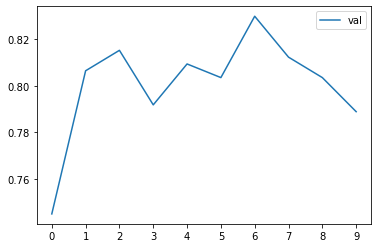

In [59]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [60]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [61]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/10
96/96 [==============================] - 20s 208ms/step - loss: 1.9262 - accuracy: 0.3403 - val_loss: 1.5806 - val_accuracy: 0.4897
Epoch 2/10
96/96 [==============================] - 16s 166ms/step - loss: 1.3832 - accuracy: 0.5613 - val_loss: 1.2368 - val_accuracy: 0.6012
Epoch 3/10
96/96 [==============================] - 16s 166ms/step - loss: 1.1397 - accuracy: 0.6463 - val_loss: 1.0575 - val_accuracy: 0.6716
Epoch 4/10
96/96 [==============================] - 16s 166ms/step - loss: 1.0022 - accuracy: 0.6858 - val_loss: 0.9497 - val_accuracy: 0.7214
Epoch 5/10
96/96 [==============================] - 16s 166ms/step - loss: 0.9087 - accuracy: 0.7141 - val_loss: 0.8773 - val_accuracy: 0.7566
Epoch 6/10
96/96 [==============================] - 16s 166ms/step - loss: 0.8401 - accuracy: 0.7376 - val_loss: 0.8281 - val_accuracy: 0.7713
Epoch 7/10
96/96 [=========================

In [65]:
del scores[0.1]
del scores[0.0001]

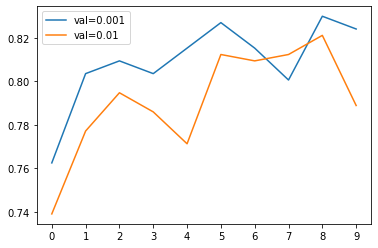

In [68]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [70]:
model.save_weights('model_v1.h5', save_format='h5')

In [21]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [79]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/10
96/96 [==============================] - 21s 216ms/step - loss: 1.1353 - accuracy: 0.6170 - val_loss: 0.7258 - val_accuracy: 0.7801
Epoch 2/10
96/96 [==============================] - 16s 168ms/step - loss: 0.6469 - accuracy: 0.7735 - val_loss: 0.6332 - val_accuracy: 0.7859
Epoch 3/10
96/96 [==============================] - 16s 169ms/step - loss: 0.5182 - accuracy: 0.8243 - val_loss: 0.5905 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 16s 170ms/step - loss: 0.4390 - accuracy: 0.8553 - val_loss: 0.5550 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 16s 170ms/step - loss: 0.3827 - accuracy: 0.8827 - val_loss: 0.5437 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 16s 170ms/step - loss: 0.3342 - accuracy: 0.8990 - val_loss: 0.5319 - val_accuracy: 0.8358
Epoch 7/10
96/96 [==============================] 

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [3]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [13]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
83689472/83683744 [==============================] - 1s 0us/step
[2021-11-03 13:35:43.005 ip-172-16-64-149:21634 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-03 13:35:43.104 ip-172-16-64-149:21634 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/10
96/96 [==============================] - 42s 438ms/step - loss: 1.1849 - accuracy: 0.6033 - val_loss: 0.8076 - val_accuracy: 0.7243
Epoch 2/10
96/96 [==============================] - 16s 169ms/step - loss: 0.7314 - accuracy: 0.7474 - val_loss: 0.7305 - val_accuracy: 0.7507
Epoch 3/10
96/96 [==============================] - 16s 169ms/step - loss: 0.5834 - accuracy: 0.8018 - val_loss: 0.6308 - val_accuracy: 0.7889
Epoch 4/10
96/96 [==============================] - 16s 170ms/step - loss: 0.4878 - accuracy: 0.8370 - val_loss: 0.6715 - val_accuracy: 

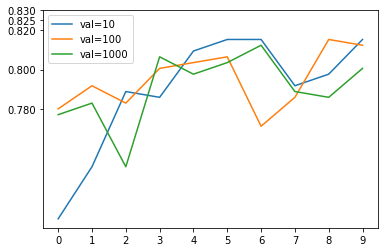

In [16]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [8]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [13]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
[2021-11-03 21:19:20.707 ip-172-16-13-140:18999 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-03 21:19:20.814 ip-172-16-13-140:18999 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/30
96/96 [==============================] - 56s 583ms/step - loss: 0.9642 - accuracy: 0.6747 - val_loss: 0.6832 - val_accuracy: 0.7566
Epoch 2/30
96/96 [==============================] - 15s 158ms/step - loss: 0.5163 - accuracy: 0.8230 - val_loss: 0.6058 - val_accuracy: 0.7918
Epoch 3/30
96/96 [==============================] - 15s 160ms/step - loss: 0.3458 - accuracy: 0.8885 - val_loss: 0.5577 - val_accuracy: 0.8270
Epoch 4/30
96/96 [==============================] - 15s 161ms/step - loss: 0.2575 - accuracy: 0.9218 - val_loss: 0.5166 - val_accuracy: 0.8416
Epoch 5/30
96/96 [==============================] - 15s 1

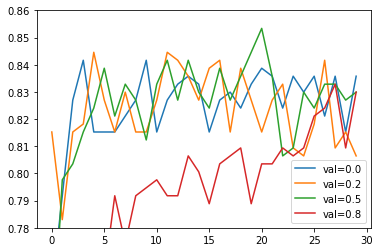

In [16]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

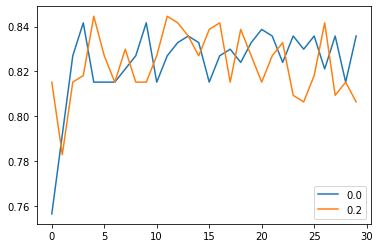

In [23]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [17]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [18]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/50
96/96 [==============================] - 19s 200ms/step - loss: 1.0738 - accuracy: 0.6346 - val_loss: 0.6670 - val_accuracy: 0.7859
Epoch 2/50
96/96 [==============================] - 16s 162ms/step - loss: 0.6210 - accuracy: 0.7846 - val_loss: 0.5732 - val_accuracy: 0.8182
Epoch 3/50
96/96 [==============================] - 16s 162ms/step - loss: 0.4573 - accuracy: 0.8387 - val_loss: 0.5620 - val_accuracy: 0.8182
Epoch 4/50
96/96 [==============================] - 15s 161ms/step - loss: 0.3637 - accuracy: 0.8797 - val_loss: 0.5376 - val_accuracy: 0.8094
Epoch 5/50
96/96 [==============================] - 16s 162ms/step - loss: 0.2951 - accuracy: 0.9042 - val_loss: 0.5465 - val_accuracy: 0.8065
Epoch 6/50
96/96 [==============================] - 16s 162ms/step - loss: 0.2348 - accuracy: 0.9283 - val_loss: 0.6016 - val_accuracy: 0.7918
Epoch 7/50
96/96 [==============================] 

KeyboardInterrupt: 

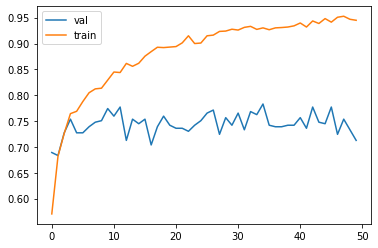

In [12]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [19]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [25]:
input_size = 299

In [38]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [39]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [40]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/50
96/96 [==============================] - 78s 816ms/step - loss: 1.0387 - accuracy: 0.6793 - val_loss: 0.5567 - val_accuracy: 0.8211
Epoch 2/50
96/96 [==============================] - 77s 805ms/step - loss: 0.5472 - accuracy: 0.8214 - val_loss: 0.4331 - val_accuracy: 0.8622
Epoch 3/50
96/96 [==============================] - 74s 772ms/step - loss: 0.4525 - accuracy: 0.8491 - val_loss: 0.4360 - val_accuracy: 0.8504
Epoch 4/50
96/96 [==============================] - 75s 778ms/step - loss: 0.4000 - accuracy: 0.8605 - val_loss: 0.3728 - val_accuracy: 0.8856
Epoch 5/50
96/96 [==============================] - 75s 785ms/step - loss: 0.3586 - accuracy: 0.8853 - val_loss: 0.3832 - val_accuracy: 0.8768
Epoch 6/50
96/96 [==============================] - 75s 777ms/step - loss: 0.3261 - accuracy: 0.8934 - val_loss: 0.3828 - val_accuracy: 0.8827
Epoch 7/50
96/96 [==============================] 

KeyError: 'val_accuracy'

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [3]:
import tensorflow as tf
from tensorflow import keras

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [7]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [11]:
model = keras.models.load_model('xception_v4_1_13_0.903.h5')

In [10]:
model.evaluate(test_ds)

  ...
    to  
  ['...']
12/12 [==============================] - 8s 645ms/step - loss: 0.2939 - accuracy: 0.8978


[0.29389633300403756, 0.89784944]

In [12]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [15]:
img = load_img(path, target_size=(299, 299))

In [16]:
import numpy as np

In [18]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [21]:
X = preprocess_input(X)

In [23]:
pred = model.predict(X)

In [25]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [26]:
dict(zip(classes, pred[0]))

{'dress': -1.4282539,
 'hat': -5.522186,
 'longsleeve': -3.1655293,
 'outwear': -2.201648,
 'pants': 9.294684,
 'shirt': -3.4289198,
 'shoes': -4.2395606,
 'shorts': 3.4339347,
 'skirt': -4.194675,
 't-shirt': -2.9939806}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

